## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

full_data = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
# pd.set_option("display.max_rows", None, "display.max_columns", None)
full_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
original_number_of_mice = mouse_metadata['Mouse ID'].count()

original_number_of_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_df = full_data[(full_data['Timepoint'] == full_data['Timepoint'].shift()) & (full_data['Mouse ID'] == full_data['Mouse ID'].shift())]

for i in duplicate_mice_df['Mouse ID']:
    full_data.drop(full_data.loc[full_data['Mouse ID'] == i].index, inplace=True)

full_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.

number_of_mice = len(full_data['Mouse ID'].unique())

number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_stats = full_data.groupby('Drug Regimen')

tumor_table = tumor_stats.agg({
    'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']
})


tumor_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

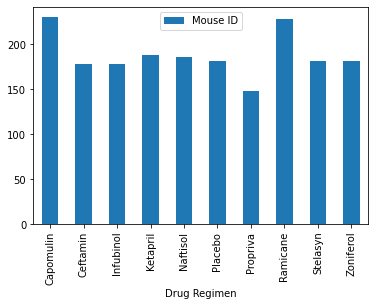

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
trials_per_drug_df = full_data[['Drug Regimen', 'Mouse ID']]

trials_per_drug_groupby = trials_per_drug_df.groupby('Drug Regimen').count()

trials_per_drug_groupby.plot(kind = 'bar')


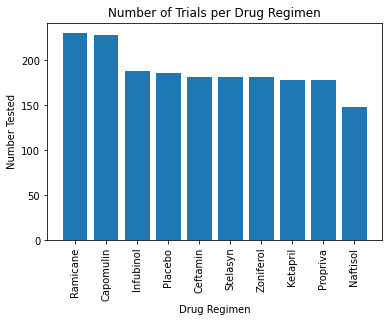

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names = full_data['Drug Regimen'].unique()
drug_number_tested = full_data['Drug Regimen'].value_counts()

plt.bar(drug_names, drug_number_tested)
plt.xlabel('Drug Regimen')
plt.ylabel('Number Tested')
plt.xticks(rotation= 90)
plt.title('Number of Trials per Drug Regimen')

plt.show()

Text(0.5, 1.0, 'Distribution of Male to Female Mice')

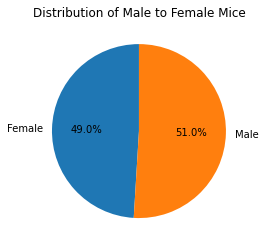

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_sex_df = full_data[['Sex', 'Mouse ID']]

mouse_sex_groupby = mouse_sex_df.groupby('Sex')

mouse_sex_groupby.count().plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.legend().remove()
plt.title('Distribution of Male to Female Mice')


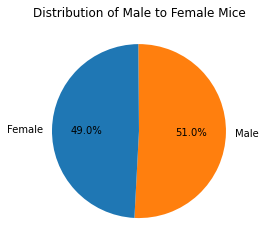

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex = full_data['Sex'].value_counts()

plt.pie(mouse_sex, autopct='%1.1f%%', startangle=267, labels= ['Male', 'Female'], colors = ['tab:orange', 'tab:blue'])

plt.title('Distribution of Male to Female Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_treatments_df = full_data[
    (full_data['Drug Regimen'] == 'Capomulin') | 
    (full_data['Drug Regimen'] == 'Ramicane') | 
    (full_data['Drug Regimen'] == 'Infubinol') |
    (full_data['Drug Regimen'] == 'Ceftamin') ]

four_treatments_df

four_treatments_groupby = four_treatments_df.groupby(['Mouse ID'])

# Start by getting the last (greatest) timepoint for each mouse
last_time = four_treatments_groupby['Timepoint'].max()
last_time_df = pd.DataFrame(last_time)
last_time_df.reset_index(inplace=True)
last_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_four_treatments = pd.merge(last_time_df, four_treatments_df, how="inner")
new_four_treatments.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_rows = new_four_treatments.loc[new_four_treatments['Drug Regimen'] == treatment]

    # add subset of tumor volumes to empty list
    tumor_vol_data.append(treatment_rows['Tumor Volume (mm3)'])

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartile = treatment_rows['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    IQR = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)

    outlier_rows = treatment_rows.loc[
        (treatment_rows['Tumor Volume (mm3)'] > upper_bound) |
        (treatment_rows['Tumor Volume (mm3)'] < lower_bound) ]
    
    print(
        f'Tumor Volumes (mm3) of {treatment}\n'
        f'------------------------------------------------------\n'
        f'The median of {treatment} is: {round(quartile[0.5],2)}\n'
        f'The lower quartile of {treatment} is: {round(lowerq,2)}\n'
        f'The upper quartile of {treatment} is: {round(upperq,2)}\n'
        f'The interquartile range of {treatment} is: {round(IQR,2)}\n'
        f'Values below {round(lower_bound,2)} or above {round(upper_bound,2)} could be outliers\n'
        f'Outliers in data set: {len(outlier_rows)}\n'
        f'\n'
    )


Tumor Volumes (mm3) of Capomulin
------------------------------------------------------
The median of Capomulin is: 38.13
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
Values below 20.7 or above 51.83 could be outliers
Outliers in data set: 0


Tumor Volumes (mm3) of Ramicane
------------------------------------------------------
The median of Ramicane is: 36.56
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
Values below 17.91 or above 54.31 could be outliers
Outliers in data set: 0


Tumor Volumes (mm3) of Infubinol
------------------------------------------------------
The median of Infubinol is: 60.17
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
Values below 36.83 or above 82.74 could be outliers
Outliers in data set: 1


Tumor Volumes (m

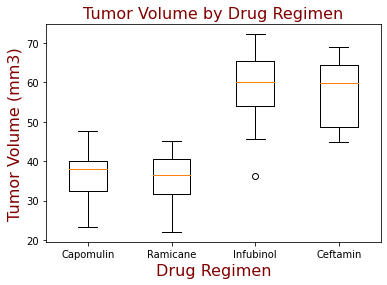

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
font = {
    'color' : 'maroon',
    'size' : '16'
}
plt.boxplot(tumor_vol_data, labels=treatments)

plt.xlabel('Drug Regimen', fontdict=font)
plt.ylabel('Tumor Volume (mm3)', fontdict=font)
plt.title('Tumor Volume by Drug Regimen', fontdict=font)

plt.show()


## Line and Scatter Plots

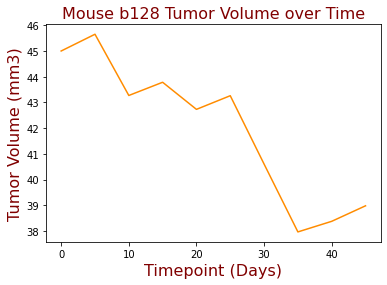

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# b128

b128 = full_data.loc[full_data['Mouse ID'] == 'b128']

b128_times = b128['Timepoint']
b128_tumor = b128['Tumor Volume (mm3)']

plt.plot(b128_times, b128_tumor, color='darkorange')
plt.xlabel('Timepoint (Days)', fontdict=font)
plt.ylabel('Tumor Volume (mm3)', fontdict=font)
plt.title('Mouse b128 Tumor Volume over Time', fontdict=font)
plt.show()

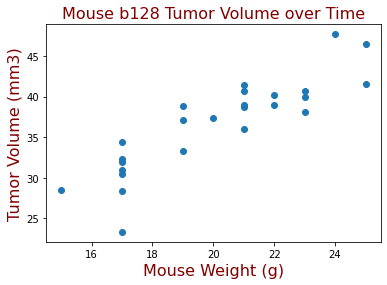

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = new_four_treatments.loc[new_four_treatments['Drug Regimen'] == 'Capomulin']

Capomulin_groupby = Capomulin_df.groupby('Mouse ID')



Capomulin_tumor_volume = Capomulin_groupby['Tumor Volume (mm3)'].mean()
Capomulin_mouse_weight = Capomulin_groupby['Weight (g)'].mean()


plt.scatter(Capomulin_mouse_weight, Capomulin_tumor_volume)

plt.xlabel('Mouse Weight (g)', fontdict=font)
plt.ylabel('Tumor Volume (mm3)', fontdict=font)
plt.title('Mouse b128 Tumor Volume over Time', fontdict=font)
plt.show()

## Correlation and Regression

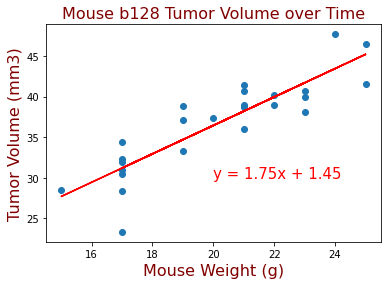

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(Capomulin_mouse_weight, Capomulin_tumor_volume)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capomulin_mouse_weight, Capomulin_tumor_volume)

regress_values = Capomulin_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(Capomulin_mouse_weight, regress_values, 'r-')
plt.annotate(line_eq,(20,30),fontsize=15, color='red')
plt.xlabel('Mouse Weight (g)', fontdict=font)
plt.ylabel('Tumor Volume (mm3)', fontdict=font)
plt.title('Mouse b128 Tumor Volume over Time', fontdict=font)



plt.show()
